## power plots for truncated $J_n(m\pi R)$ (zeroth order bessel beam)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.integrate import cumtrapz,simps
import numpy as np
from scipy import interpolate
from scipy.fft import fft2,ifft2,fftfreq,fftshift
import imageio
import scipy.special as sp

import pint

u = pint.UnitRegistry()

note that all distances are in millimeter

We will find power as a function of distance for truncated zeroth order bessel beam
$J_n(m\pi R)$

In [2]:
def compute_U(xv, yv, lam, z):
    
    # parameters of bessel beam
    n = 0
    m = 5
    
    U00 = np.heaviside(R+3,1)-np.heaviside(R-3,1) #defines 3mm aperture
    U01 = sp.jv(n,m*np.pi*R)                      #defines the bessel beam
    U0 = U00*U01                                  #truncated bessel beam by 3mm aperture
    
    
# applying angular spectrum propagation on U0    
    A = fft2(U0)
    kx = 2*np.pi * fftfreq(len(x), np.diff(x)[0])
    kxv, kyv = np.meshgrid(kx,kx)
    k = 2*np.pi/lam
    ans =  ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))
    return (np.abs(ans))**2    #intensity pattern of U0


# This function returns intensity pattern of truncated bessel beam at z distance



In [3]:
#defining parameters 
lam = 660 * 10**(-6)   #wavelength of the source

x = np.linspace(-5,5,2000)
xv, yv = np.meshgrid(x, x)  #defining meshgrid in xy plane

R = np.sqrt(xv**2+yv**2)
U0 = np.heaviside(R+3,1)-np.heaviside(R-3,1)
U0 = U0.astype(float)
print(x.shape)

(2000,)


In [4]:
U = compute_U(xv, yv, lam, z=50)  #computing intensity pattern at z = 50mm distance

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


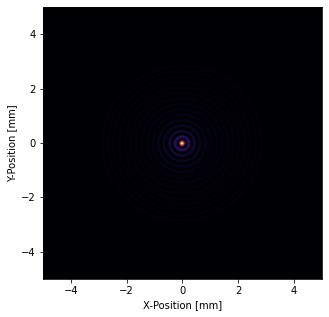

In [5]:
# plotting intensity pattern found in above cell

plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U), cmap='inferno')
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()


In [6]:
k = np.arange(0,2000,1)

 Using the compute_U function we can get intensity pattern at any distance z from the aperture. Now we will compute the power of beam contained within 3mm radius by integrating compute_U function in xy plane

In [7]:
h = 10/2000

lam = 660*10**(-6)    # wavelength of source = 660 nm
l = []  #defining empty list for storing power at different distances


#defines aperture
def uu(xv,yv):
     return (np.heaviside(np.sqrt(xv**2+yv**2)+3,1)-np.heaviside(np.sqrt(xv**2+yv**2)-3,1))

#finding power at different distances z    
for z in range(0,6400,100):
    u = compute_U(xv,yv,lam,z)*uu(xv,yv) #intensity pattern within central area of aperture size
    a = 0
    # calculating power by numerical integration
    for i in k:
        for j in k:
            a += h*h*(u[i][j])
    
    l.append(a)
    
    
l1 = l/l[0]  #Normalizing the power 


### plotting power as a function of distance

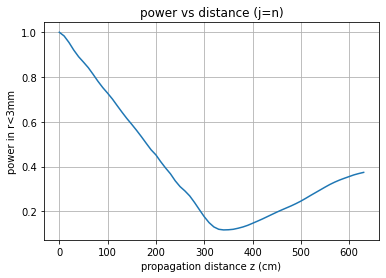

In [8]:
kk = range(0,640,10)
plt.plot(kk,l1)
plt.title('power vs distance (j=n)')
plt.xlabel('propagation distance z (cm)')
plt.ylabel('power in r<3mm')
#plt.axhline(0.5)
plt.grid()
plt.show()

In [2]:
ccc = np.ones((1,len(l1))).flatten()
k = np.argwhere(np.diff(np.sign(l1-0.5*ccc)))
print(k*10)

NameError: name 'np' is not defined

In [1]:
m = range(0,640,10)
m[18]           #gives distance z in cm at which power reduces to half of its initial value

180